In [17]:
import pandas as pd
import matplotlib.pyplot as plt


In [19]:
# Load the dataset from the uploaded Excel file
file_path = 'C:/Users/lourd/A6_Open Project/Data Sets/efficient_space_data.xlsx'
data = pd.read_excel(file_path)


In [21]:
# Display the first few rows of the dataset to understand its structure
data.head()

,Real Property Use,Utilization,Number of Federal Employees,Square Feet (Buildings),Owned and Otherwise Managed Annual Operations Cost,Owned and Otherwise Managed Annual Maintenance Cost
0,Laboratories,Utilized,23,16750,1726.41,5179.24
1,Laboratories,Utilized,18,22524,1726.41,5179.24
2,Office,Utilized,13,2175,1726.41,5179.24
3,Laboratories,Utilized,91,7335,1726.41,5179.24
4,Laboratories,Utilized,17,10400,1726.41,5179.24


In [23]:
# Calculate Employee-to-Square Foot Ratio and Cost per Square Foot for each record
data['Employee per SqFt'] = data['Number of Federal Employees'] / data['Square Feet (Buildings)']
data['Total Cost per SqFt'] = (data['Owned and Otherwise Managed Annual Operations Cost'] + 
                               data['Owned and Otherwise Managed Annual Maintenance Cost']) / data['Square Feet (Buildings)']


In [25]:
# Group by Real Property Use to get the average utilization efficiency metrics for each property type
efficiency_summary = data.groupby('Real Property Use').agg({
    'Employee per SqFt': 'mean',
    'Total Cost per SqFt': 'mean'
}).reset_index()


In [27]:
# Display the efficiency metrics for each property type in the terminal
print(efficiency_summary)


            Real Property Use  Employee per SqFt  Total Cost per SqFt
0                   All Other           0.000122             8.091325
1   Border/Inspection Station           0.000490             1.692561
2           Child Care Center           0.000000             8.592398
3   Comfort Station/Restrooms           0.000000            19.885653
4      Communications Systems           0.000042            21.159400
5        Dormitories/Barracks           0.000089            13.019471
6              Family Housing           0.000060             8.890519
7                  Industrial           0.000018            16.705960
8                Laboratories           0.000744            13.608101
9                      Office           0.003854            10.396964
10   Other Institutional Uses           0.000172            14.516250
11                     School           0.000040             7.449166
12                    Service           0.000155            12.061536
13                 W

Employee per Square Foot: The average number of employees per square foot for each property type.
Total Cost per Square Foot: The combined operational and maintenance cost per square foot for each property type.

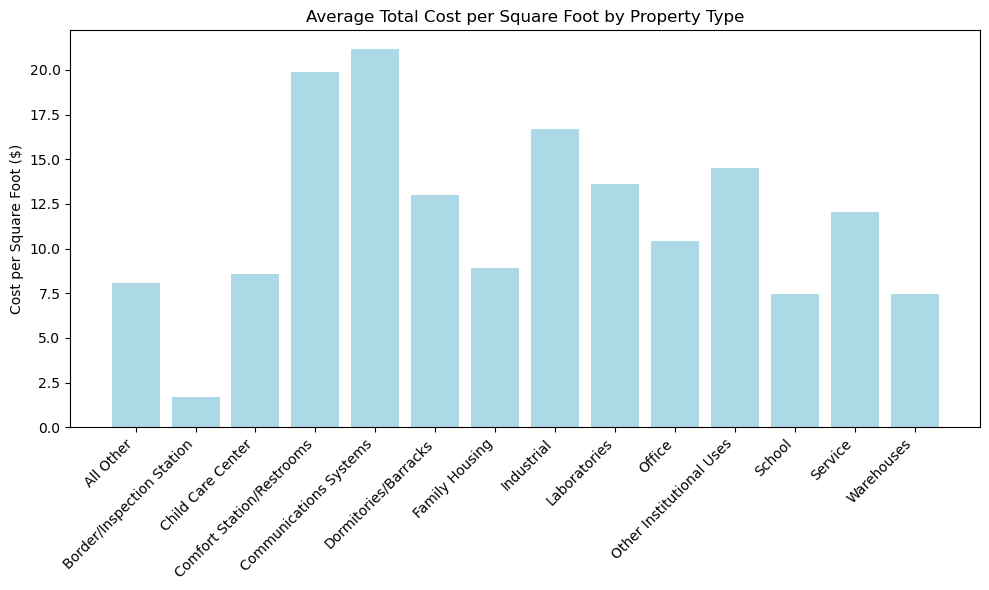

In [44]:
# Create a new figure for the Total Cost per Square Foot visual
plt.figure(figsize=(10, 6))

# Plot for Total Cost per SqFt
plt.bar(efficiency_summary['Real Property Use'], efficiency_summary['Total Cost per SqFt'], color='lightblue')
plt.title('Average Total Cost per Square Foot by Property Type')
plt.ylabel('Cost per Square Foot ($)')
plt.xticks(rotation=45, ha='right')

# Adjust layout for better readability
plt.tight_layout()

# Save the figure as a JPEG image
plt.savefig('C:/Users/lourd/A6_Open Project/Data Sets/Visuals/average_total_cost_per_square_foot.jpg', dpi=300)

# Show the plot
plt.show()